In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

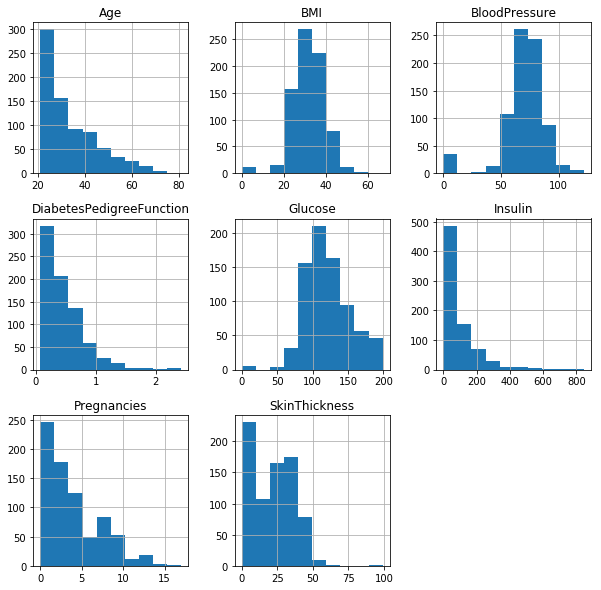

In [4]:
df[df.columns[:8]].hist(figsize=(10,10));

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


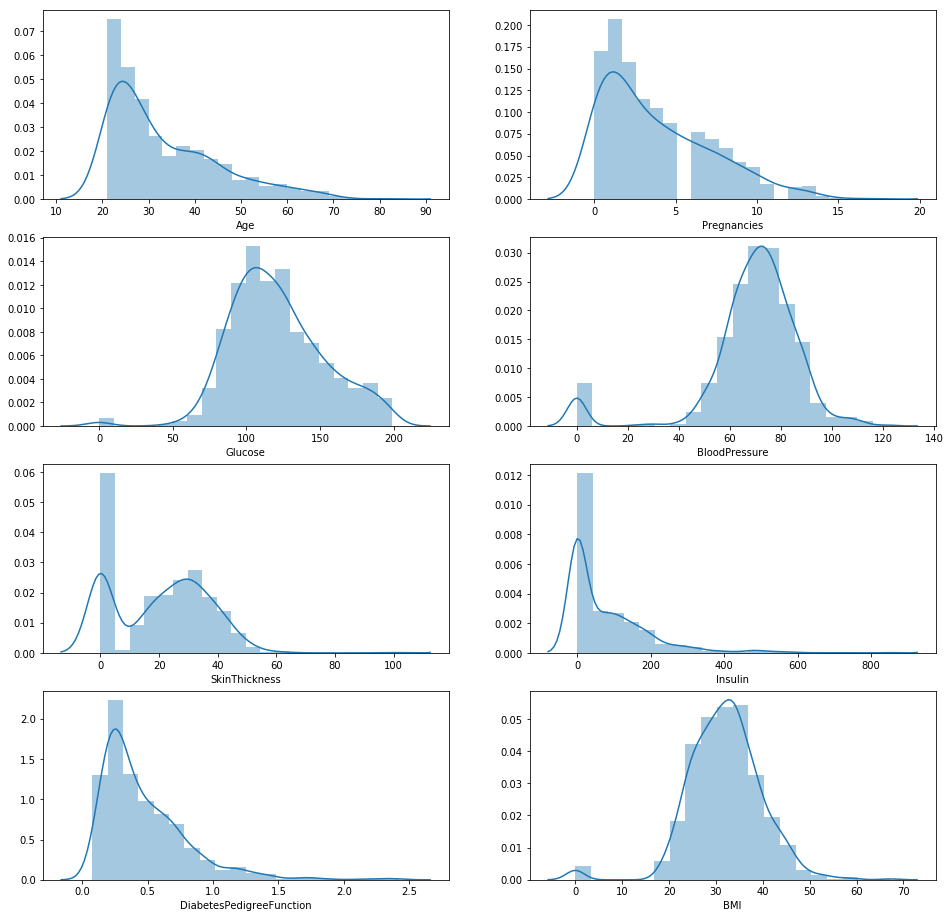

In [5]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

In [6]:
# Lets check the figures as well
for c in df.columns:
    if c not in ['Pregnancies', 'Outcome']:
        print ('0 values in', c, ':', sum(df[c]==0))

0 values in Glucose : 5
0 values in BloodPressure : 35
0 values in SkinThickness : 227
0 values in Insulin : 374
0 values in BMI : 11
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


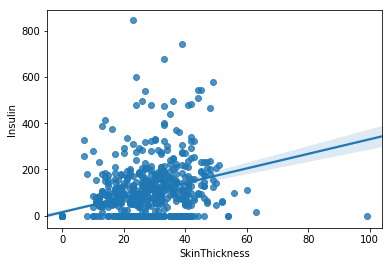

In [7]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=df)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


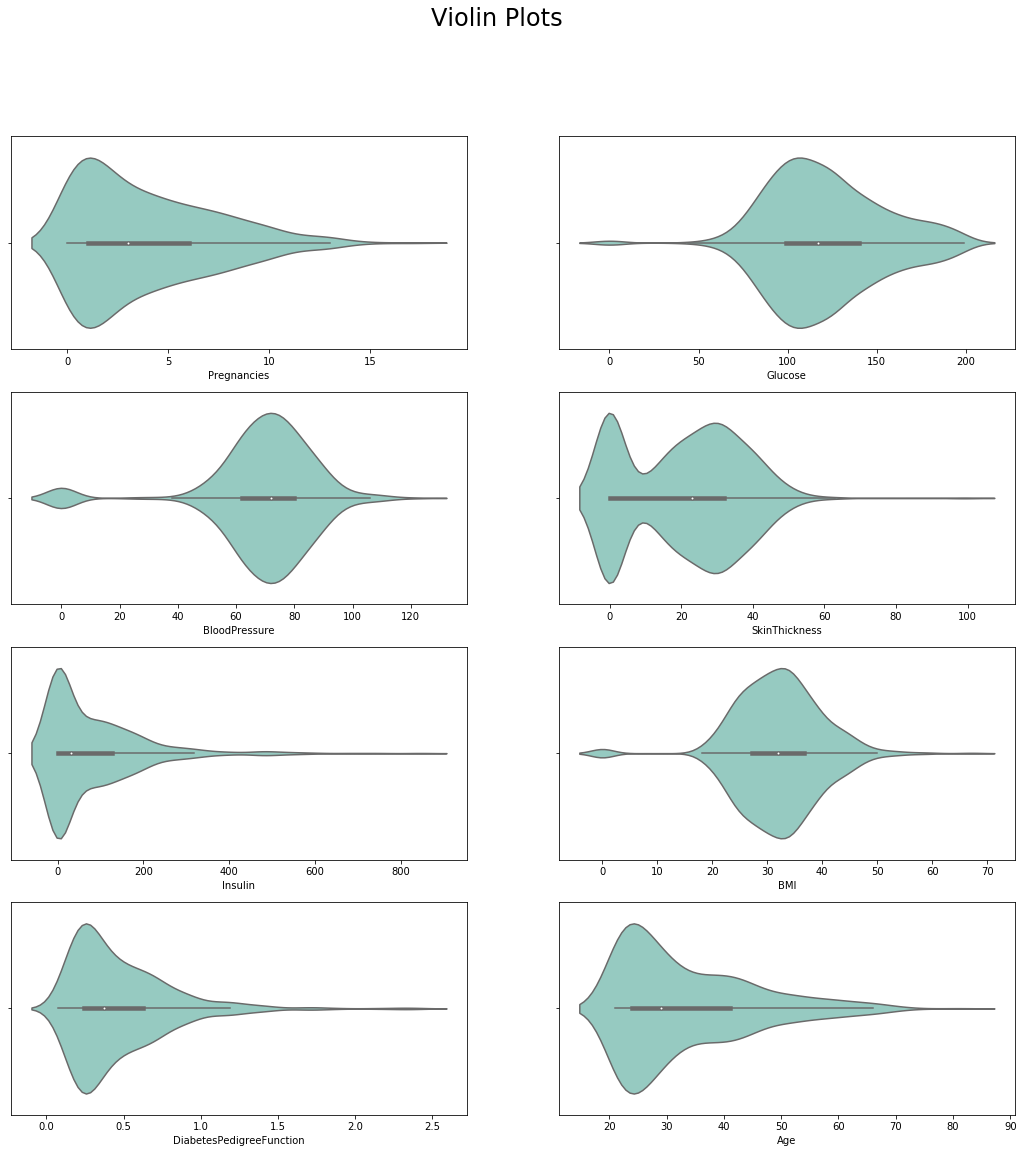

In [8]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=df,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=df,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=df, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=df, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=df, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DiabetesPedigreeFunction', data=df, ax=ax[3,0],palette='Set3')
sns.violinplot(x='Age', data=df, ax=ax[3,1],palette='Set3')
plt.show()

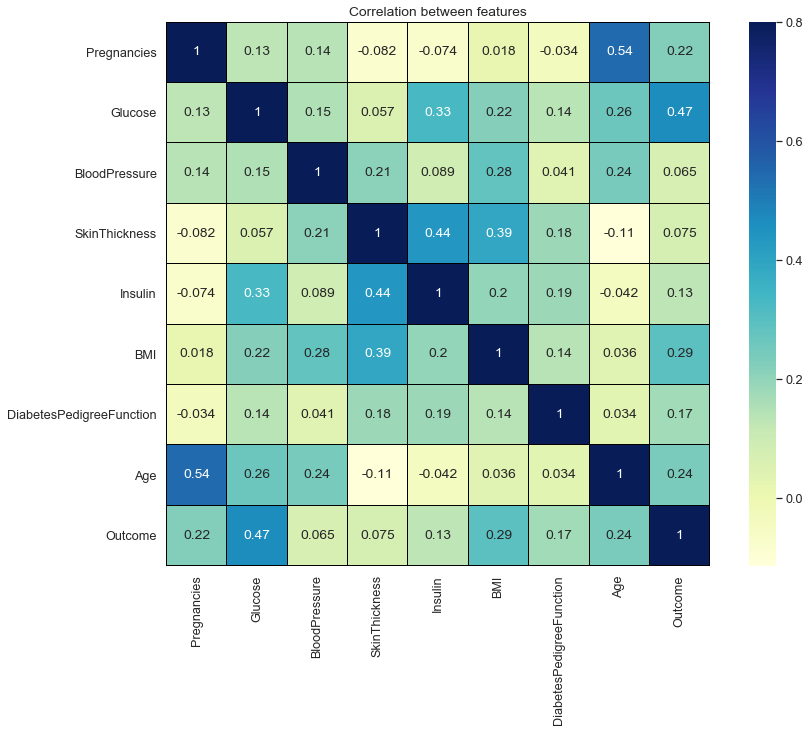

In [9]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')

In [12]:
df[df.columns[1:8]] = pd.DataFrame(imputer.fit_transform(df[df.columns[1:8]]))

In [13]:
# Lets check the figures again
for c in df.columns:
    if c not in ['Pregnancies', 'Outcome']:
        print ('0 values in', c, ':', sum(df[c]==0))

0 values in Glucose : 0
0 values in BloodPressure : 0
0 values in SkinThickness : 0
0 values in Insulin : 0
0 values in BMI : 0
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[df.columns[0:8]])
df[df.columns[0:8]] = scaler.transform(df[df.columns[0:8]])

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.240305,0.152250,0.291518,0.168179,0.204015,0.348958
std,0.198210,0.196376,0.123435,0.095557,0.103826,0.140597,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.489796,0.239130,0.133413,0.288344,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)

Testing Accuracy  79.16666666666666


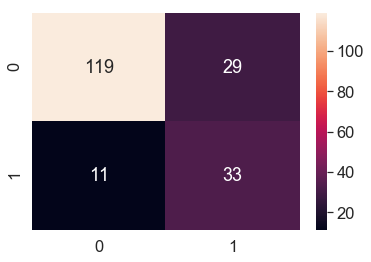

In [18]:
#Model
LR = LogisticRegression(solver="sag", max_iter=10000)

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Testing Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Testing Accuracy  76.04166666666666


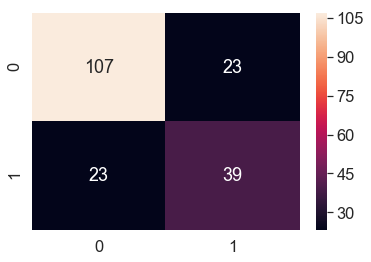

In [19]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Testing Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

# Decision Tree hyperparameter tuning.
DTC = DecisionTreeClassifier()

# Define parameter grid.
dt_param_grid = {"max_depth": [4, 6, 8, 10],
                 "max_features": ["sqrt", "log2", 2, 5, 8],
                 "min_samples_split": [3, 4, 5, 10],
                 "min_samples_leaf": [3, 4, 5, 10],
                 "criterion": ["gini", "entropy"],
                 "class_weight": [None, 'balanced']
                }

# Search grid and store best estimator.
gsDTC = GridSearchCV(DTC,param_grid = dt_param_grid, cv=5, 
                     scoring="f1", n_jobs= 4)
gsDTC.fit(X_train,y_train)
DTC_best = gsDTC.best_estimator_

# Print best score.
print('Best score: {}'.format(gsDTC.best_score_))
print('Best parameters: {}'.format(gsDTC.best_params_))

Best score: 0.6941892467449315
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest hyperparameter tuning. 
RFC = RandomForestClassifier()

# Define parameter grid.
rf_param_grid = {"max_depth": [4, 6, 8, 10],
                 "max_features": ["sqrt", "log2", 2, 5, 8],
                 "min_samples_split": [3, 4, 5, 8],
                 "min_samples_leaf": [3, 4, 5, 8],
                 "bootstrap": [False, True],
                 "n_estimators" :[100],
                 "criterion": ["gini", "entropy"],
                 "class_weight": [None, 'balanced']
                }
                
# Search grid and store best estimator.
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=4, scoring="f1", n_jobs= 4)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Print best score.
print('Best score: {}'.format(gsRFC.best_score_))
print('Best parameters: {}'.format(gsRFC.best_params_))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.7044324281118901
Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 100}



Feature Importances for Best Model:


Text(0,0.5,'Features')

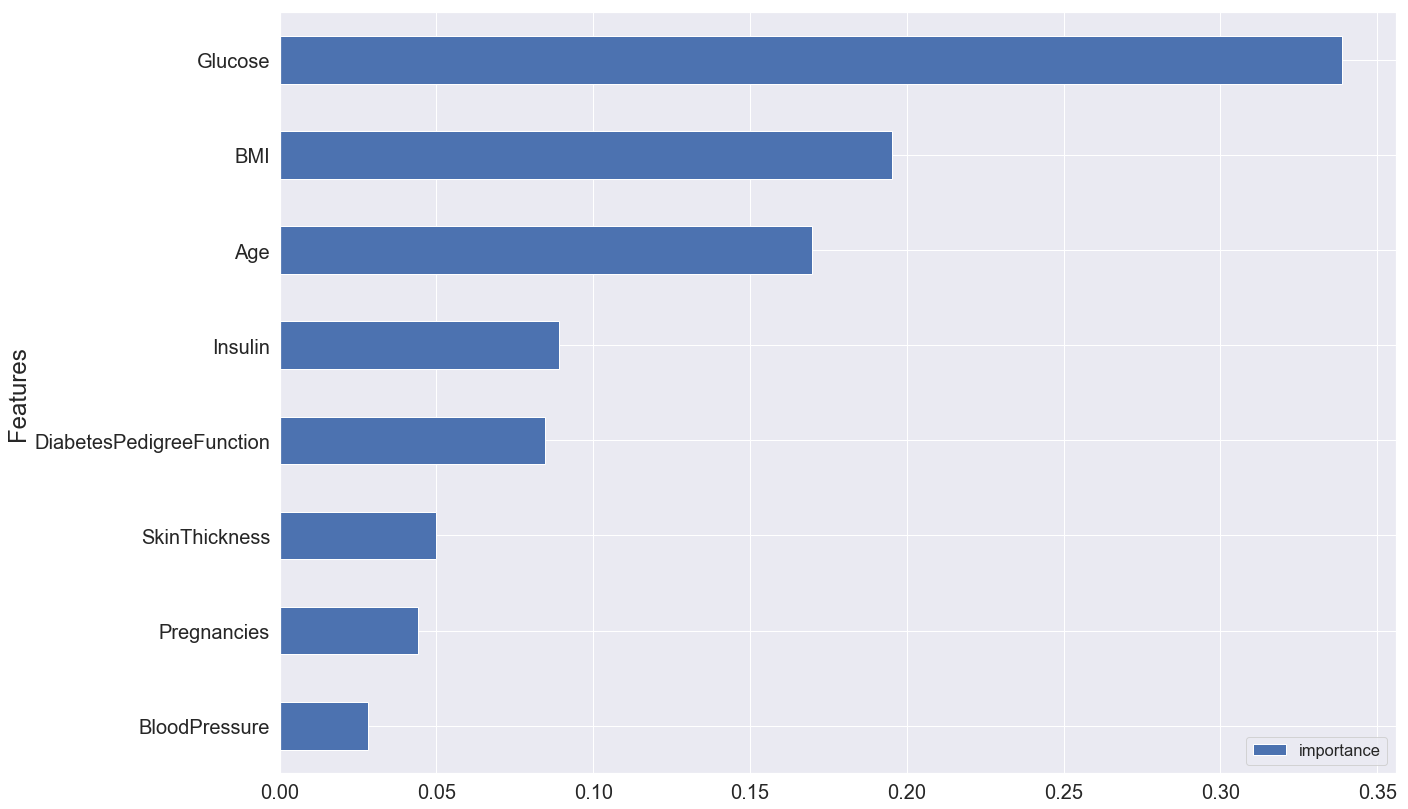

In [22]:
#Look at feature importances for best model.
RFC_best.fit(X_train,y_train)
features_best = pd.DataFrame()
features_best['feature'] = X_train.columns
features_best['importance'] = RFC_best.feature_importances_
features_best.sort_values(by=['importance'], ascending=True, inplace=True)
features_best.set_index('feature', inplace=True)

#Plot.
print("\nFeature Importances for Best Model:")
ax = features_best.plot(kind='barh', figsize=(20, 14), fontsize=20)
ax.set_ylabel("Features", fontname="Arial", fontsize=24)

In [23]:
# Print Classification Report for both training and test data.
test_predictions = RFC_best.predict(X_test)
train_predictions = RFC_best.predict(X_train)
print('\n***Training Data***')
print('\nClassification Report:')
print(classification_report(y_train, train_predictions))
print('\n***Test Data***')
print('\nClassification Report:')
print(classification_report(y_test, test_predictions))


***Training Data***

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.85       370
           1       0.70      0.85      0.77       206

    accuracy                           0.81       576
   macro avg       0.80      0.82      0.81       576
weighted avg       0.83      0.81      0.82       576


***Test Data***

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       130
           1       0.67      0.74      0.70        62

    accuracy                           0.80       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.80      0.80      0.80       192



Accuracy  79.16666666666666


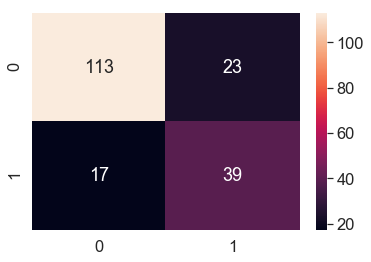

In [24]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()